# Homework 01

### Import libraries

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from scipy.stats import norm

In [2]:
from src.armedBandit import ArmedBandit
from src.policy import *

In [3]:
tf.random.set_seed(2022)

### Question 1

Define an N-armed bandit where $N = 10$. Let $q(a)$ denote the action-values associated with each arm, for $a = 1,··· ,N$. Let the agent play this multi-armed bandit for T = 1000 time steps. 


$$Q_t(a) = \frac{1}{N_t(a)} \sum_{k=1}^{N_t(a)} R_{t_k (a)}$$

In [4]:
n = 10
t = 1000
init = 0
greedy = Greedy()
bandit = ArmedBandit(n, t, init, greedy)
bandit.simulate()

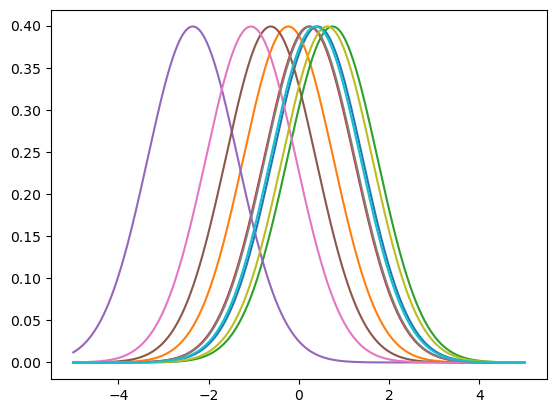

In [5]:
plt.clf()
q = bandit.get_dist()
x_axis = np.arange(-5, 5, 0.01)
for q_a in q:
    plt.plot(x_axis, norm.pdf(x_axis, q_a, 1))
plt.show()

**(a)** Initialize all $Q_t(a) = 0 $ for $a = 1,··· ,N$. Simulate a Greedy agent who follows the action selection method of
$$A_t = \operatorname*{arg\,max}_{1 \leq a \leq N} Q_t(a)$$

Plot the average reward $R_t$ for $t = 1,··· ,T$. Also plot the fraction of times the optimal action was selected for $t = 1,··· ,T$.
$$\bar{R}_t = \frac{1}{t} \sum_{k=1}^t R_k$$

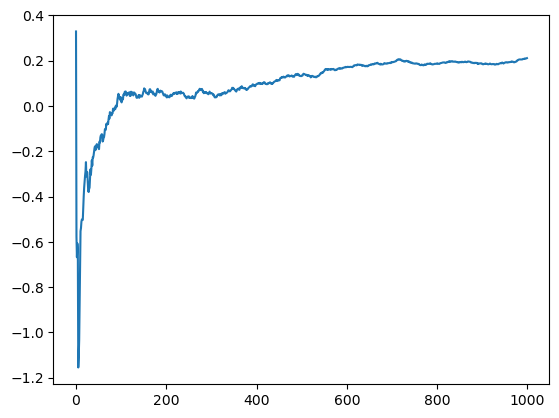

In [6]:
r = bandit.get_reward_steps()
plt.clf()
plt.plot(range(t), r)
plt.show()

$$\rho = \frac{N_t(a^*)}{t}$$

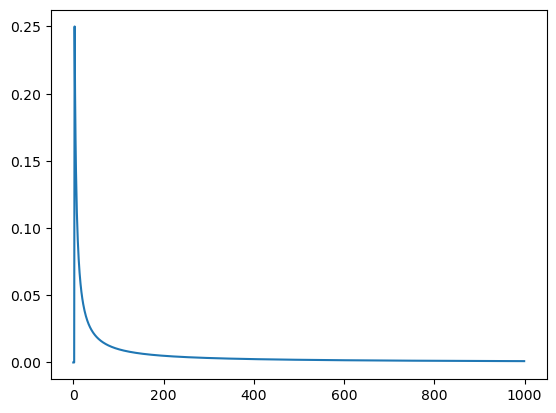

In [7]:
p = bandit.get_best_fraction()
plt.clf()
plt.plot(range(t), p)
plt.show()

**(b)** Initialize all $Q_t(a) = 5$ for $a = 1,··· ,N$. 

In [8]:
init = 5
bandit = ArmedBandit(n, t, init, greedy)
bandit.simulate()

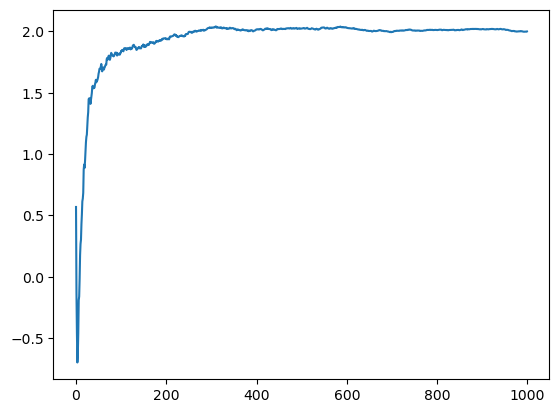

In [9]:
r = bandit.get_reward_steps()
plt.clf()
plt.plot(range(t), r)
plt.show()

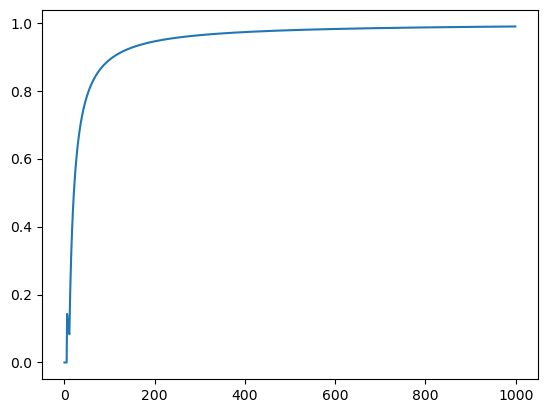

In [10]:
p = bandit.get_best_fraction()
plt.clf()
plt.plot(range(t), p)
plt.show()

**(extra)** Try with other policies. 

In [11]:
init = 0
egreedy = EGreedy(0.3)
bandit = ArmedBandit(n, t, init, egreedy)
bandit.simulate()

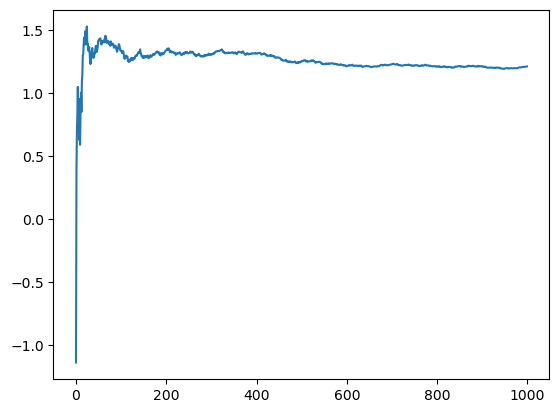

In [12]:
r = bandit.get_reward_steps()
plt.clf()
plt.plot(range(t), r)
plt.show()

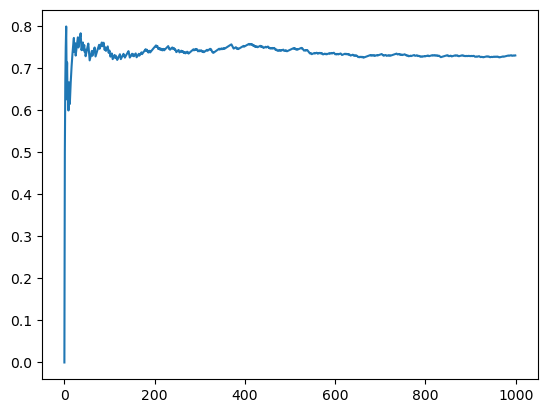

In [13]:
p = bandit.get_best_fraction()
plt.clf()
plt.plot(range(t), p)
plt.show()

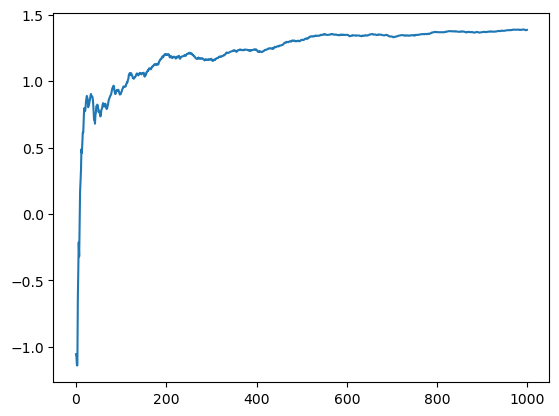

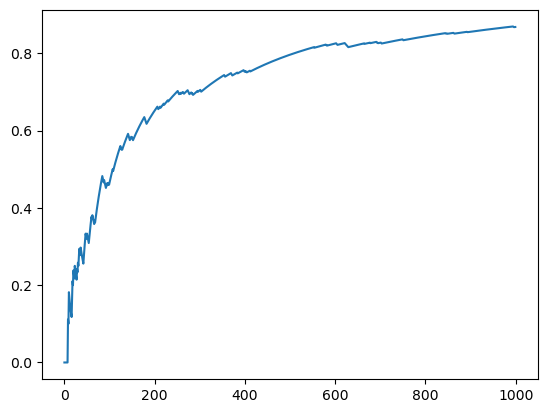

In [14]:
init = 0
ucb = UCB()
bandit = ArmedBandit(n, t, init, ucb)
bandit.simulate()

r = bandit.get_reward_steps()
plt.clf()
plt.plot(range(t), r)
plt.show()

p = bandit.get_best_fraction()
plt.clf()
plt.plot(range(t), p)
plt.show()

**(c)** Comment on the agent’s learning performance in the two cases above. Is one method better than the other? Does this seem a reliable and reasonable way to learn the best lever to pull? What would you have done differently?

The second case with an initialization of $Q_t(a)$ = 5 shows better results. The main reason is that the first one can be biased by the first positive reward due to the zero initialization, so greedy policy just exploit and don't explore other pahts. On the other hand, the second case starts with a positive value of 5, so there is an opportunity for exploration, given the distribution we are using. However, if the distribution changes, the initialization with 5 won't be enough to improve the performance. In this case, we'll have to change the initialization depending on the distribution range, but most of the time we won't know the distribution looks like. For this reason, using another policy would be the best option, even more if the policy exploits and explores the arms such as $e$-greedy policy.